In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
print(heart_disease.variables) ## info regarding the variables

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [ ]:
import pandas as pd

In [ ]:
heart_df = pd.concat([X, y], axis=1)
heart_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [ ]:
heart_df.to_csv('heart_data.csv', index=False)

In [ ]:
heart_df.shape

(303, 14)

num is the target variable which is in multiclass

In [ ]:
heart_df['num'].value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


the target variable is multiclass.

num (target) value counts:
0 → patients with no heart disease
1, 2, 3, 4 → patients with heart disease

# *Data cleaning (Handling missing values and Duplicate entries)*

In [ ]:
heart_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_df = heart_df.dropna()
print(f"Rows count with out missing values: {len(heart_df)}")

Rows count with out missing values: 297


six rows with missing (NaN) values are dropped

In [ ]:
dup = heart_df.duplicated()
print(f"Duplicate rows count: {dup.sum()}")

Duplicate rows count: 0


# *Visualisation of Features and Target Column from the Preprocessed Data*

In [ ]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


***Heat map Analysis***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

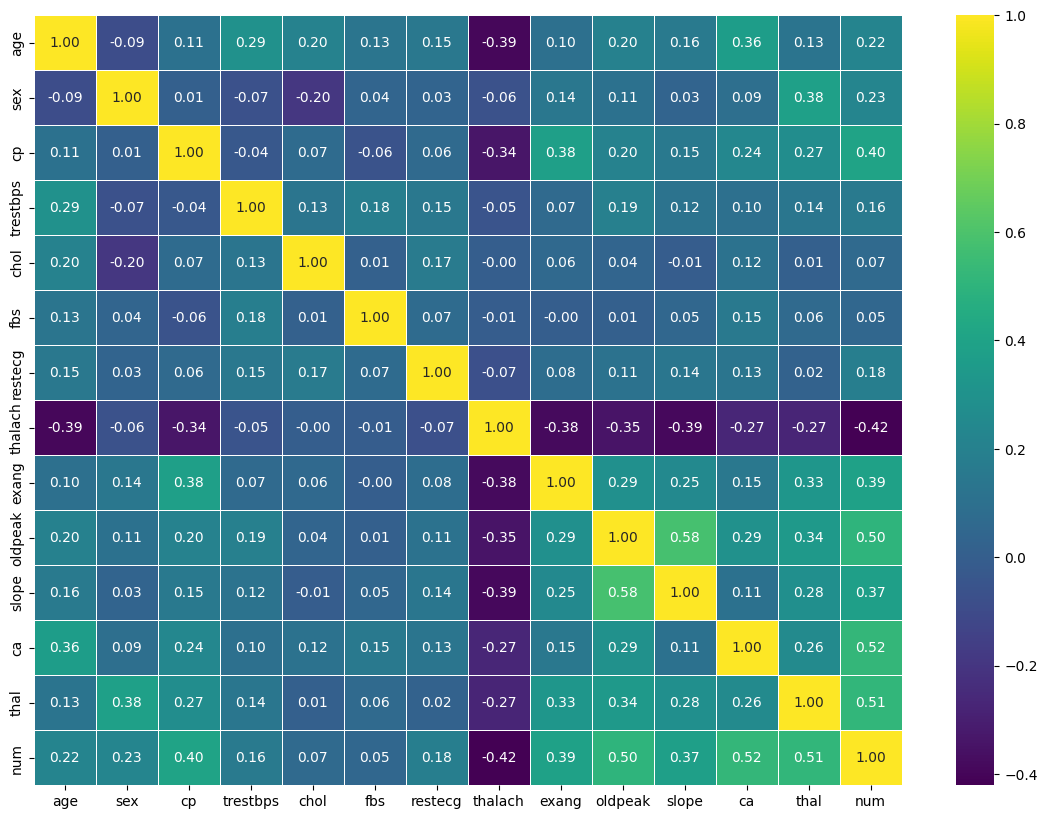

In [ ]:
corr_mtx = heart_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_mtx, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.show()

In [ ]:
# Correlation of features with the target (num) column
corr_mtx["num"].sort_values(ascending=True)

,num
thalach,-0.420639
fbs,0.049040
chol,0.066448
trestbps,0.159620
restecg,0.184136
age,0.222156
sex,0.226797
slope,0.374689
exang,0.391613
cp,0.404248


***Histogram - Age distribution***

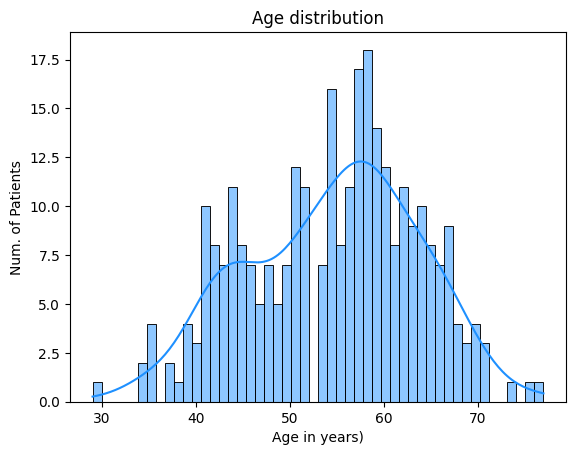

In [ ]:
sns.histplot(heart_df['age'], bins=50, color='dodgerblue', kde=True)
plt.title('Age distribution')
plt.ylabel('Num. of Patients')
plt.xlabel('Age in years)')
plt.show()

***Histogram - Distribution of Resting Blood Pressure***

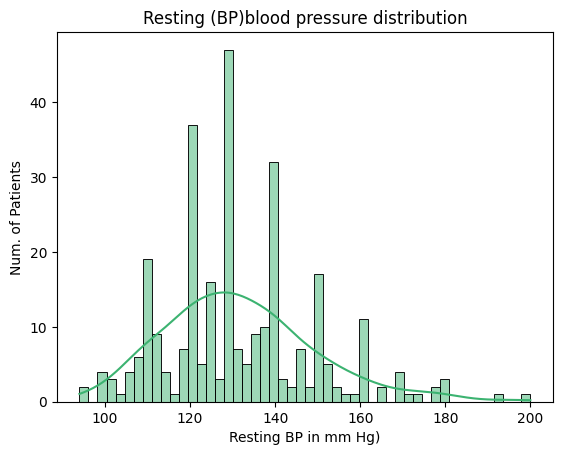

In [ ]:
sns.histplot(heart_df['trestbps'], bins=50, color='mediumseagreen', kde=True)
plt.title('Resting (BP)blood pressure distribution')
plt.ylabel('Num. of Patients')
plt.xlabel('Resting BP in mm Hg)')
plt.show()

***Count Plots of Categorical Features Grouped by Target Variable***

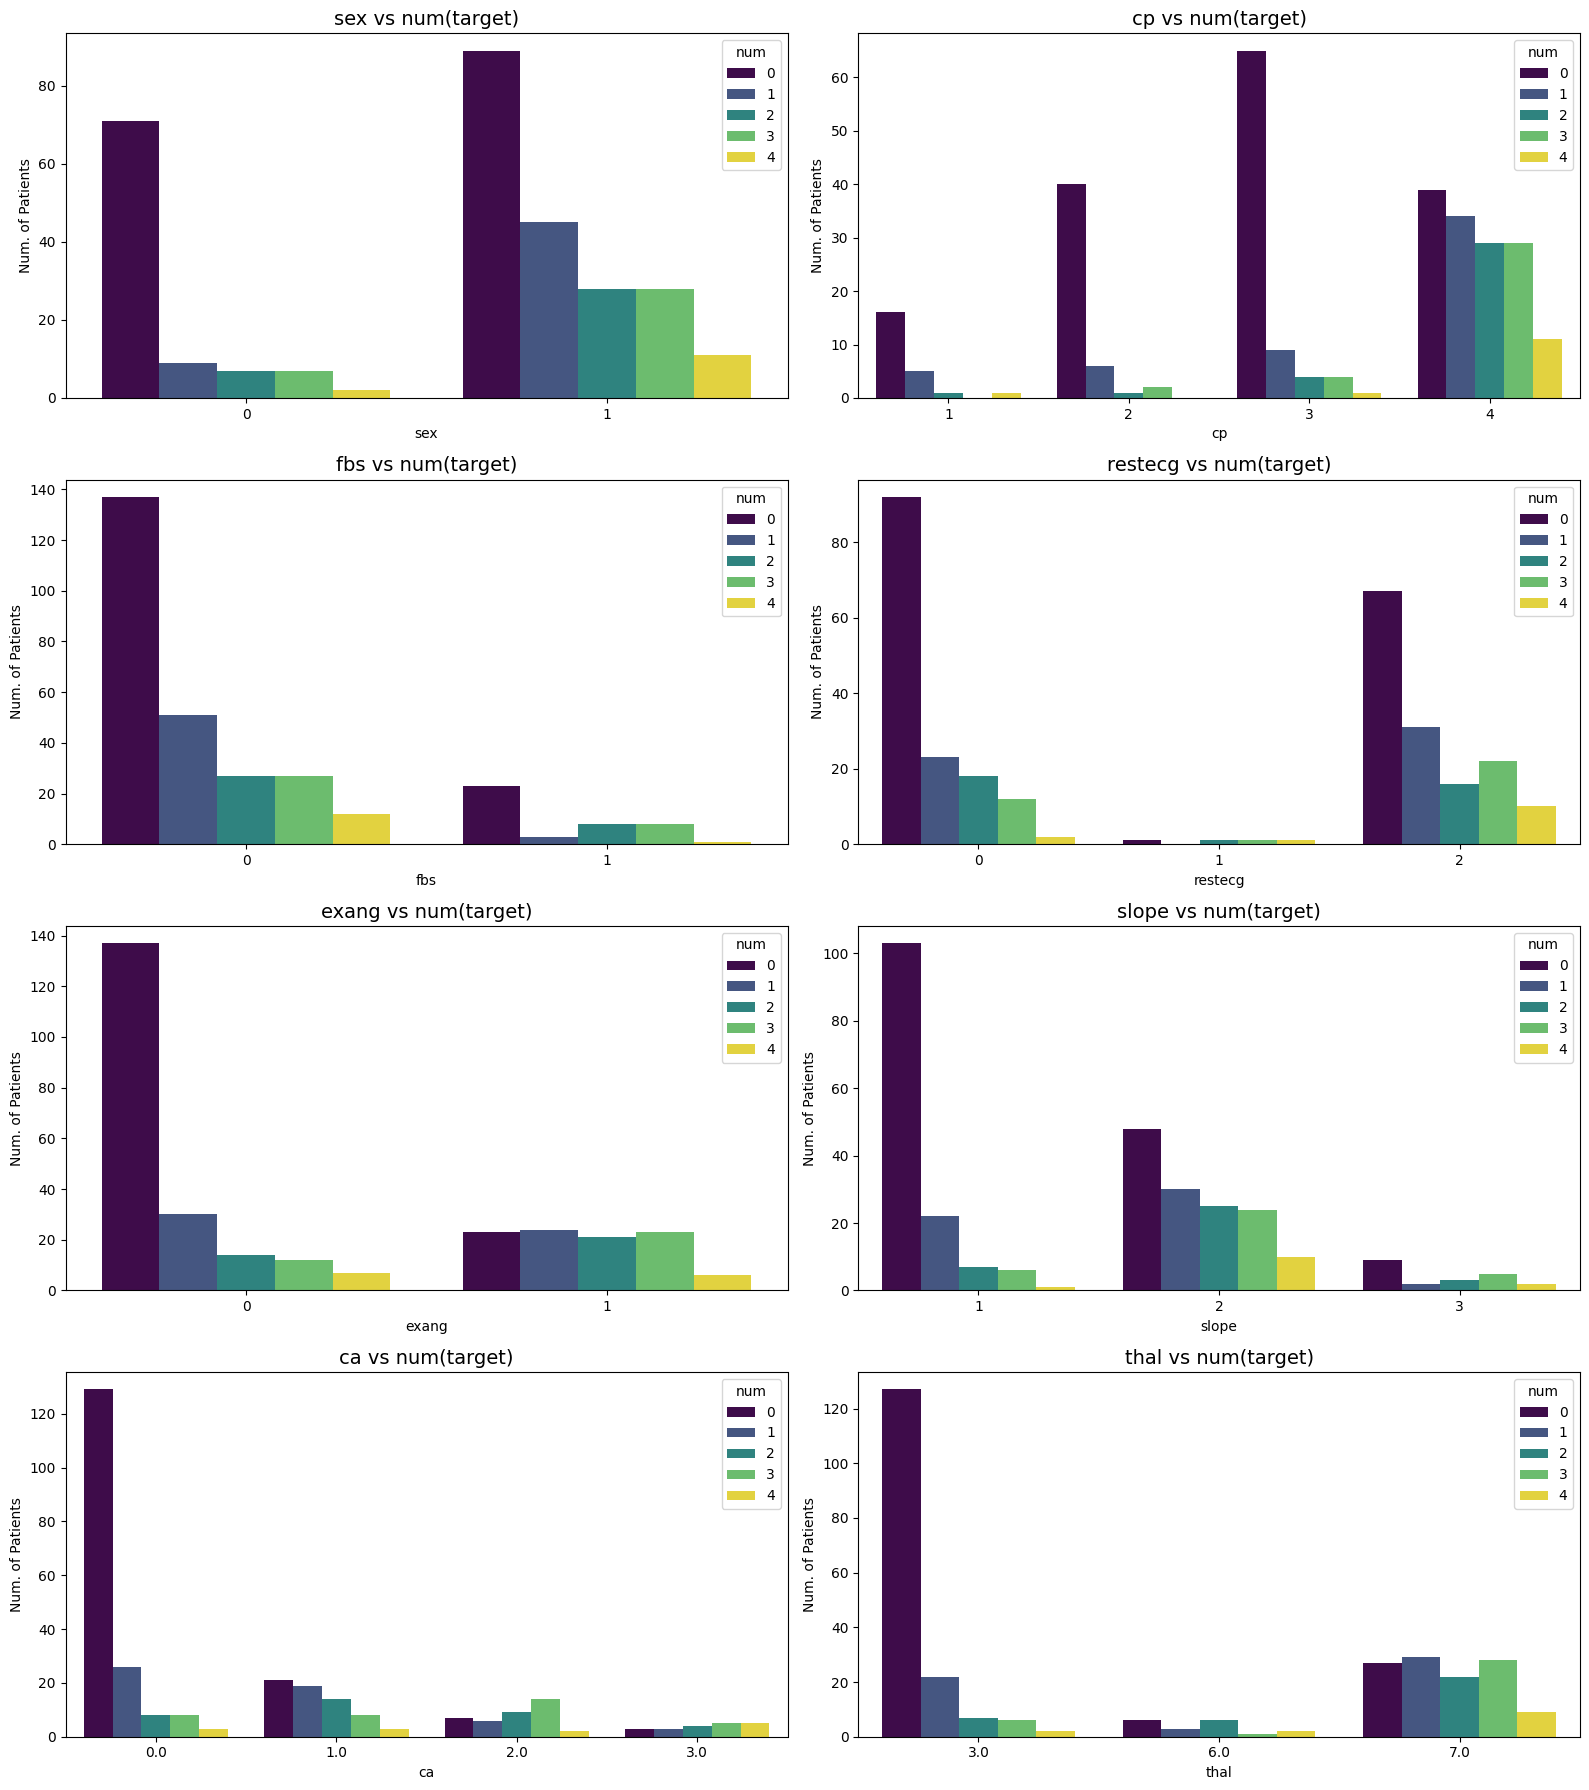

In [ ]:
features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

fig, axs = plt.subplots(4, 2, figsize=(16, 18))
axs = axs.flatten()
for idx, feature in enumerate(features):
    sns.countplot(x=feature, hue="num", data=heart_df, palette="viridis", ax=axs[idx])
    axs[idx].set_title(f"{feature} vs num(target)", fontsize=14)
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel("Num. of Patients")
plt.tight_layout()
plt.show()

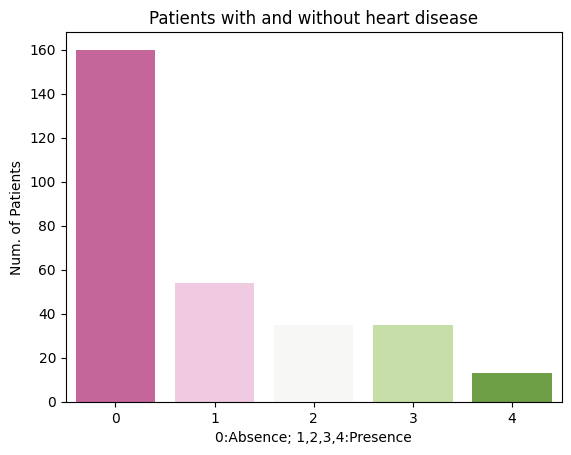

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data=heart_df, palette='PiYG', x='num')
plt.title('Patients with and without heart disease')
plt.ylabel('Num. of Patients')
plt.xlabel('0:Absence; 1,2,3,4:Presence')
plt.show()

num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [ ]:
heart_df.to_csv('heart_disease.csv', index=False)